<a href="https://colab.research.google.com/github/laventura/mir_stuff/blob/main/MIR_Day1_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Python and PyTorch Review

This notebook provides a quick review of Python, focusing on concepts critical for understanding and writing PyTorch code. It then demonstrates a minimal, functional example of time-series forecasting using PyTorch.

In [1]:
import numpy as np

class MusicalScore:
  def __init__(self, title, composer):
    self.title = title
    self.composer = composer
    self.notes = []   # notes to play
    self.durations = [] # store note durations (float)
    self.dynamics = [] # note dynamics levels (str)

  def add_note(self, note, duration, dynamic):
    self.notes.append(note)
    self.durations.append(duration)
    self.dynamics.append(dynamic)

  def get_total_duration(self):
    if len(self.durations) == 0:
      raise Exception("No notes in score")
    return np.sum(self.durations)

  def get_most_common_dynamics(self):
    if len(self.dynamics) == 0:
      raise Exception("No notes in score")
    return max(set(self.dynamics), key=self.dynamics.count)

  def display_summary(self):
    print(f"Title: {self.title}")
    print(f"Composer: {self.composer}")
    print(f"Total Duration: {self.get_total_duration()} seconds")
    print(f"Most Common Dynamics: {self.get_most_common_dynamics()}")
    print("Notes: ", ' '.join(self.notes))


In [2]:
# example for Fur Elise
score = MusicalScore("Fur Elise", "Ludwig van Beethoven")

# notes to the score
fur_elise_notes = [
    ("E4", 0.5, "piano"), ("D#4", 0.5, "piano"),
    ("E4", 0.5, "piano"), ("D#4", 0.5, "piano"),
    ("E4", 0.5, "piano"),
    ("B3", 0.5, "mezzo-forte"), ("D4", 0.5, "forte"),
    ("C4", 0.5, "forte"), ("A3", 1, "fortissimo")
]

for note, duration, dynamic in fur_elise_notes:
  score.add_note(note, duration, dynamic)

score.display_summary()

Title: Fur Elise
Composer: Ludwig van Beethoven
Total Duration: 5.0 seconds
Most Common Dynamics: piano
Notes:  E4 D#4 E4 D#4 E4 B3 D4 C4 A3


In [3]:
import librosa
import IPython.display as ipd


In [4]:
my_fur_elise = [] # audio notes

for i in range(len(score.notes)):
  freq = librosa.note_to_hz(score.notes[i])
  duration = score.durations[i]
  num_samples = int(duration * 44100) # sampling rate 44.1khz
  t = np.linspace(0, duration, num_samples)
  dynamic = score.dynamics[i]
  note = np.sin(2 * np.pi * freq * t)
  my_fur_elise = np.append(my_fur_elise, note)

# normalize it first
my_fur_elise = 0.8 * my_fur_elise / np.max(np.abs(my_fur_elise))
ipd.display( ipd.Audio(my_fur_elise, rate=44100) )

### Pitch class and octaves

Two notes with fundamental frequencies in a ratio equal to any power of two (e.g., half, twice, or four times) are perceived as very similar. Because of that, all notes with this kind of relation can be grouped under the same pitch class.

--2025-08-19 18:27:46--  https://www.daviddarling.info/images_music/octaves_of_C.jpg
Resolving www.daviddarling.info (www.daviddarling.info)... 198.54.116.70
Connecting to www.daviddarling.info (www.daviddarling.info)|198.54.116.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45962 (45K) [image/jpeg]
Saving to: ‘octaveC.jpg’

octaveC.jpg         100%[===================>]  44.88K  --.-KB/s    in 0.04s   

2025-08-19 18:27:47 (1.13 MB/s) - ‘octaveC.jpg’ saved [45962/45962]



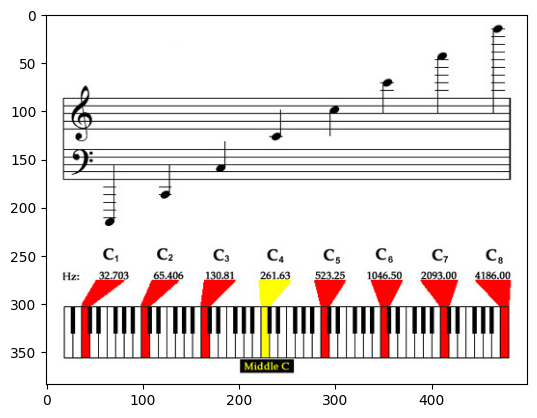

In [5]:
!wget "https://www.daviddarling.info/images_music/octaves_of_C.jpg" -O octaveC.jpg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('octaveC.jpg')
plt.imshow(img)

In [6]:
# Generate 7 octaves of c
def generate_sinusoid_pitches(pitches=[69], dur=0.5, Fs=4000, amp=1):
  """
    Generate sin
    pitches: list of pitches to generate(def: [69])
    dur (float) duration in sec
    Fs: sampling rate (int)
    amp (float) amplitude (def 1)

    Returns:
    x: array of samples (np.ndarray) - Signal
    t: time (in sec) (np.ndarray)
  """
  N = int(dur * Fs)
  t = np.arange(N) / Fs
  x = []
  for p in pitches:
    freq = 2 **((p - 69) / 12) * 440
    x = np.append(x, np.sin(2 * np.pi * freq * t))

  x = amp * x / np.max(x)
  return x, t

In [7]:
dur = 1
Fs = 22050

pitches = [36, 48, 60, 72, 84, 96, 108]
x, t = generate_sinusoid_pitches(pitches=pitches, dur=dur, Fs=Fs, amp=1)
print("Pitch class C = {36, 48, 60, 72, 84, 96, 108}", flush=True)

ipd.display(ipd.Audio(x, rate=Fs))

Pitch class C = {36, 48, 60, 72, 84, 96, 108}


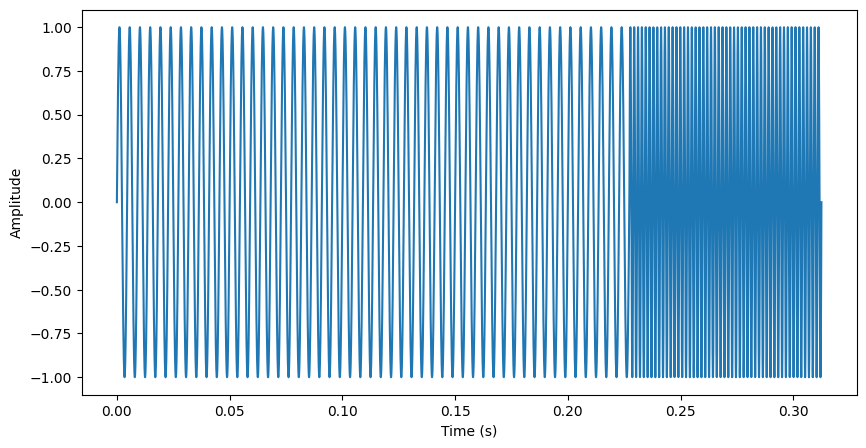

In [8]:
## Create a signal that starts with 220 Hz for 50 cycles, and then continues with
## 587 Hz for another 50 cycles

freq1 = 220 # Hz, note A3
num1 = 50

freq2 = 587 # Hz, note D5
num2 = 50

# durations
dur1 = num1 / freq1
dur2 = num2 / freq2
total_duration = dur1 + dur2

sampling_rate = 44100 # hz
num_samples1 = int(dur1 * sampling_rate)
num_samples2 = int(dur2 * sampling_rate)
num_samples = num_samples1 + num_samples2

# - create time vectors -
t1 = np.linspace(0, dur1, num_samples1)
t2 = np.linspace(0, dur2, num_samples2)
t = np.concatenate((t1, t2))

# - gen waveforms -
data1 = np.sin(2 * np.pi * freq1 * t1)
phase_at_transition = 2 * np.pi * freq1 * dur1 # radians
# If data1 at t1 = duration1 has an instantaneous phase of phase_at_transition, then its value is sin(phase_at_transition).
# Therefore, we need data2 at t2 = 0 to also have the value sin(phase_at_transition).
# Using the general sine wave equation for data2:
# data2(t2) = sin(2 * pi * freq2 * t2 + phi_initial_for_data2)
# For continuity, we need sin(phi_initial_for_data2) = sin(phase_at_transition).
data2 = np.sin(2 * np.pi * freq2 * t2 + phase_at_transition)
data = np.concatenate((data1, data2))

# play audio
ipd.display(ipd.Audio(data, rate=sampling_rate))

# show plot
t_total = np.linspace(0, total_duration, num_samples)
plt.figure(figsize=(10, 5))
plt.plot(t_total, data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

### PyTorch stuff

PyTorch is an open source machine learning library used for applications such as computer vision and natural language processing. It is primarily developed by Facebook's AI Research lab (FAIR).
Key Features:

    Tensor computation (like NumPy) with strong GPU acceleration
    Automatic differentiation for building and training neural networks

Simple Time-Series Forecasting in PyTorch

We'll now implement a simple time-series forecasting model using PyTorch to predict future values based on past data.

In [9]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

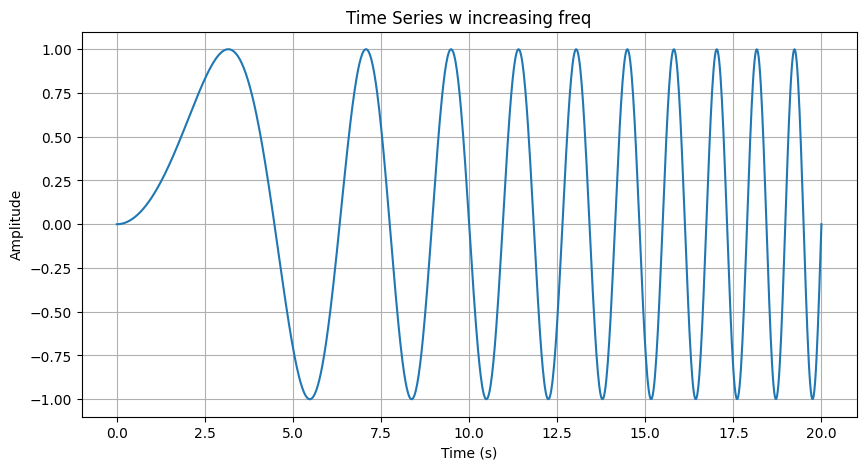

In [10]:
# generate a time series data where the frequency of the sine wave increases
t = np.linspace(0, 20, 1000) # increase resolution for a smoother curve
data = np.sin(t * np.pi * t / 20) # freq increases as t increases

# plot the data
plt.figure(figsize=(10, 5))
plt.plot(t, data, label='sin(π * t * t / 20)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.title('Time Series w increasing freq')
plt.show()

### Create a Dataset and DataLoader for Time Series

A custom Dataset must implement three functions:

```
__init__, __len__, __getitem__

```

In [11]:
from torch.utils.data import Dataset, DataLoader

class TimeSeriesDataset(Dataset):
  def __init__(self, series, window_size, forecast_size):
    self.series = series
    self.window_size = window_size
    self.forecast_size = forecast_size

  def __len__(self):
    """ returns number of samples in the dataset """
    return len(self.series) - self.window_size - self.forecast_size + 1

  def __getitem__(self, idx):
    """ returns a sample from the dataset at the given index """
    return (self.series[idx: idx+self.window_size],
            self.series[idx+self.window_size: idx+self.window_size+self.forecast_size])


In [12]:
# create dataset and data loader
window_size = 250
forecast_size = 50
dataset = TimeSeriesDataset(data, window_size, forecast_size)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)
#

In [13]:
## define the forecasting model
class ForecastingModel(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(ForecastingModel, self).__init__()
    self.linear = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.linear(x)

## init the model
input_len = window_size
output_len = forecast_size
model = ForecastingModel(input_len, output_len)


In [15]:
## train the model

# - define loss
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# training loop
num_epochs = 100
for p in range(num_epochs):
  for seq, labels in dataloader:
    optimizer.zero_grad()
    y_pred = model(seq.float())
    loss = criterion(y_pred, labels.float())
    loss.backward()
    optimizer.step()
  if p % 10 == 0:
    print(f"Epoch {p+1}/{num_epochs}, Loss: {loss.item()}")

Epoch 1/100, Loss: 0.03270292654633522
Epoch 11/100, Loss: 0.026525720953941345
Epoch 21/100, Loss: 0.03524572029709816
Epoch 31/100, Loss: 0.10066798329353333
Epoch 41/100, Loss: 0.009762111119925976
Epoch 51/100, Loss: 0.021626055240631104
Epoch 61/100, Loss: 0.04523588716983795
Epoch 71/100, Loss: 0.22521735727787018
Epoch 81/100, Loss: 0.03278248384594917
Epoch 91/100, Loss: 0.015162119641900063


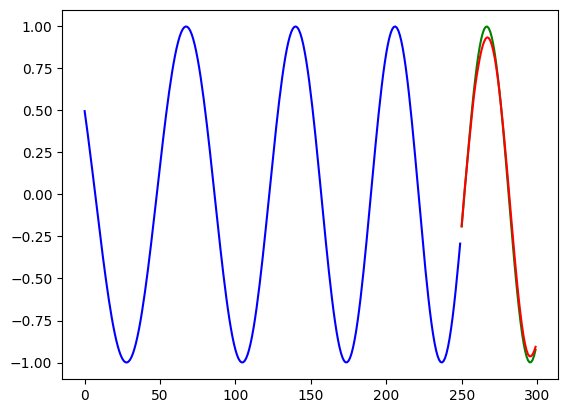

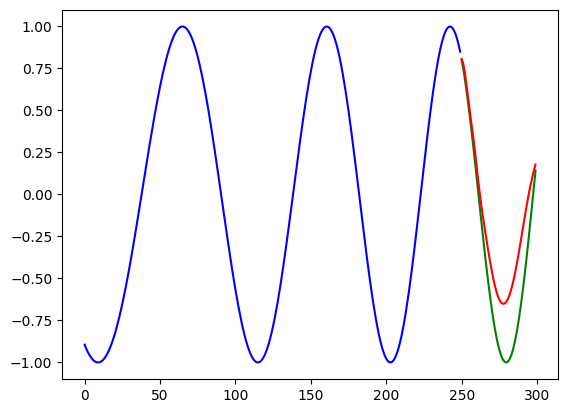

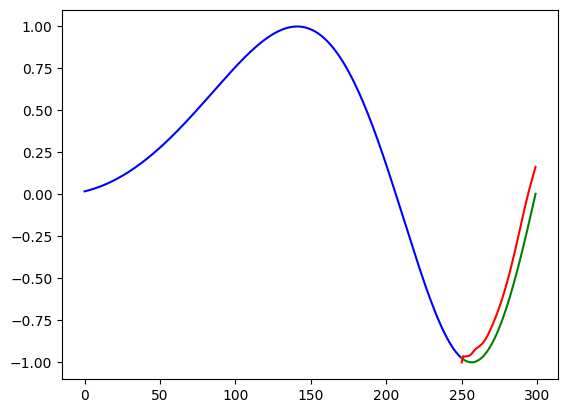

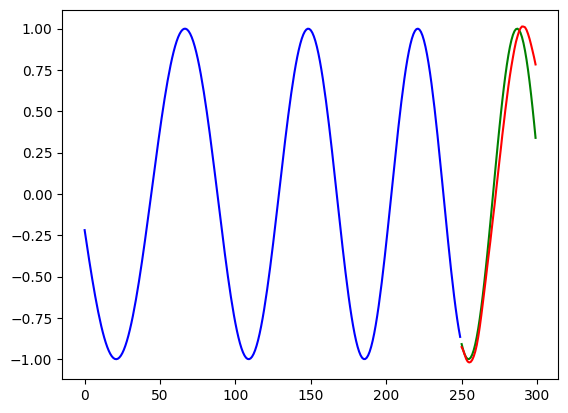

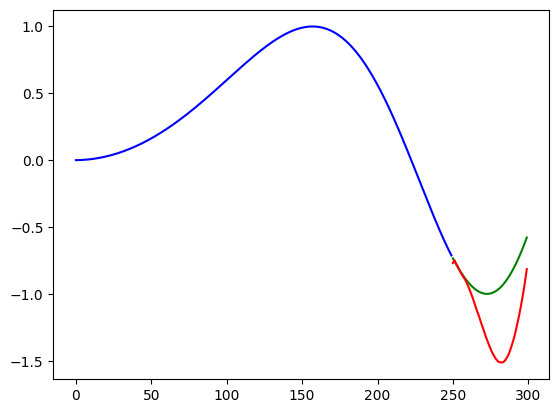

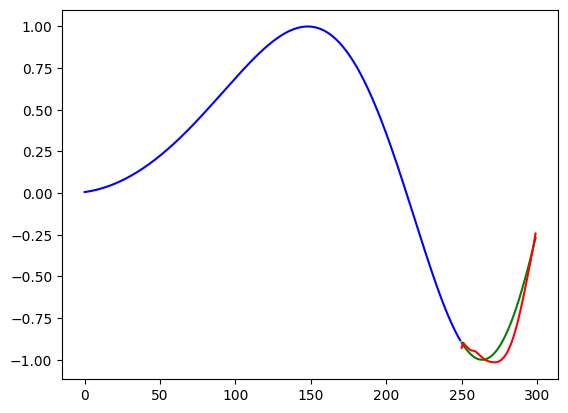

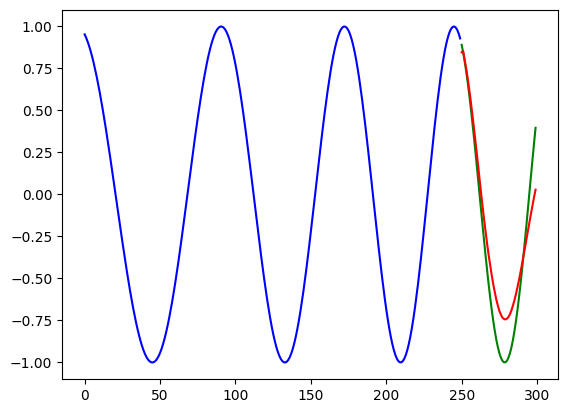

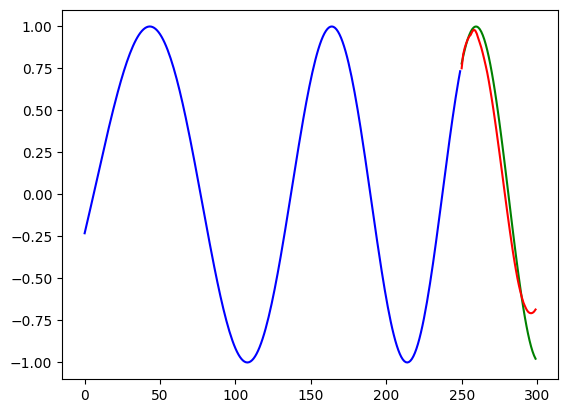

In [17]:
# plot
for i, (seq, labels) in enumerate(dataloader):
  if i % 100 == 0:
    y_pred = model(seq.float())
    plt.plot(seq.T, 'b')
    plt.plot(range(window_size, window_size + forecast_size), labels.T, 'g')
    plt.plot(range(window_size, window_size + forecast_size), y_pred.T.detach(), 'r')
    plt.show()